In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sklearn
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import word_tokenize
from sklearn import decomposition
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import string 
import itertools 
from autocorrect import Speller 
import enchant
from sklearn.cluster import KMeans
from tqdm import tqdm
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [ ]:
dataset = pd.read_csv('C:/Users/Flavia/Desktop/dataset/Reviews.csv')
dataset['ProfileName'].fillna("", inplace = True)
dataset['Summary'].fillna("", inplace = True)
dataset.set_index('Id', inplace = True)

In [ ]:
ps = PorterStemmer()
spell = Speller(lang='en')
tokenizer = nltk.RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
d = enchant.Dict("en_US")


def clean_text(text): 
    
    words = word_tokenize(text)
    filtered_words = []
    for word in words:
         
        if d.check(word):
            if word.lower() not in stop_words and word.isalpha() and word not in string.punctuation:
                filtered_words.append(lemmatizer.lemmatize((ps.stem(word)).lower()))
            
    return filtered_words

In [ ]:
l=[]
j=1
for i in list(dataset['Text']):
    
    l.append(' '.join((clean_text(i))))

In [ ]:
dataset['clean_Text']=l
dataset['clean_Text']=dataset['clean_Text'].fillna("", inplace = True)

In [ ]:
dataset['clean_Text'].to_csv('C:/Users/Flavia/Desktop/clean_text.csv')

In [ ]:
df_text = pd.read_csv('C:/Users/Flavia/Desktop/clean_text.csv')
df_text['clean_Text'].fillna("", inplace = True)

In [9]:
model = KMeans()
model.fit(X_svd)
pred = model.fit_predict(X_svd)

KMeans()

In [26]:
elbow = {}
optimal_score=[]
for k in tqdm(range(1, 12)):
    elbow_model = KMeans(n_clusters=k)
    elbow_model.fit_predict(X_svd)
    elbow[k] = elbow_model.inertia_
    optimal_score.append(elbow_model.inertia_)

100%|█████████████████████████████████████████████████████████████████████████████████| 11/11 [25:27<00:00, 138.87s/it]


The optimal number of cluster is:  5


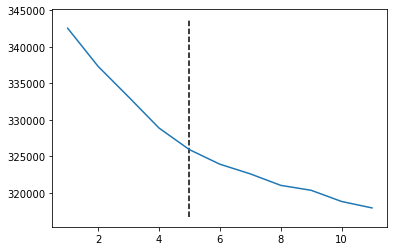

In [48]:
kn = KneeLocator(list(elbow.keys()), list(elbow.values()), curve='convex', direction='decreasing')
print('The optimal number of cluster is: ',kn.knee)

plt.plot(list(elbow.keys()), list(elbow.values()))
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()